In [105]:
import pandas as pd

In [106]:
df = pd.read_json("shanghan_learn/data/SH_ty2.json")

In [107]:
sh_fang_data = df.T

In [108]:
import re
sh_fang_data.index = sh_fang_data.index.map(lambda x: int(re.search("(\d)*", x)[0]))

In [109]:
sh_fang_data = sh_fang_data.sort_index()
sh_fang_data

,原文,名,方,经,证
1,{'对应证原文': ['太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风...,桂枝汤,"{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出..."
2,"{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",桂枝加葛根汤,"{'葛根': '4两', '桂枝': '3两', '芍药': '2两', '炙甘草': '2...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}"
3,{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...,桂枝加附子汤,"{'附子': '1两', '桂枝': '3两', '芍药': '3两', '炙甘草': '3...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'..."
4,"{'对应证原文': ['太阳病。下之后。脉促。胸满者。桂枝去芍药汤主之。'], '方剂原文'...",桂枝去芍药汤,"{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['大便后胸胀'], '脉证': ['急促']}"
5,"{'对应证原文': ['若微寒者。桂枝去芍药加附子汤主之。'], '方剂原文': '桂枝三两...",桂枝去芍药加附子汤,"{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}"
6,{'对应证原文': ['面色反有热色者。未欲解也。以其不能得小汗出 。 身必痒。宜桂枝麻黄各...,桂枝麻黄各半汤,"{'桂枝': '1两16铢', '炙甘草': '1两', '生姜': '1两', '大枣':...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['身痒'], '脉证': ['暂无']}"
7,{'对应证原文': ['服桂枝汤。大汗出。脉洪大者。与桂枝汤如前法。若形似疟。一日再发者。汗...,桂枝二麻黄一汤,"{'桂枝': '1两17铢', '炙甘草': '1两6铢', '生姜': '1两6铢', '...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['暂无'], '脉证': ['暂无']}"
8,"{'对应证原文': ['服桂枝汤。大汗出后。大烦渴不解。脉洪大者。白虎加人参汤主之。'], ...",白虎加人参汤,"{'知母': '6两', '石膏': '1斤', '炙甘草': '2两', '粳米': '6...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['烦躁', '口渴'], '脉证': ['洪大']}"
9,{'对应证原文': ['太阳病。发热恶寒。热多寒少。脉微弱者。此无阳也。不可发汗。宜桂枝二越...,桂枝二越婢一汤,"{'桂枝': '1两', '芍药': '1两', '炙甘草': '1两', '麻黄': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}"
10,{'对应证原文': ['服桂枝汤。或下之。仍头项强痛。翕翕发热。无汗。心下满微痛。小便不利者...,桂枝去桂加茯苓白术汤,"{'白术': '3两', '芍药': '3两', '炙甘草': '2两', '茯苓': '3...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['严重头痛', '发热无汗', '心下满', '小便不多', '身体微痛']..."


In [110]:
sh_fang_data = sh_fang_data.set_index("名")
sh_fang_data

,原文,方,经,证
名,,,,
桂枝汤,{'对应证原文': ['太阳中风，阳浮而阴弱，阳浮者热自发，阴弱者汗自出，啬啬恶寒，淅淅恶风...,"{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出..."
桂枝加葛根汤,"{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...","{'葛根': '4两', '桂枝': '3两', '芍药': '2两', '炙甘草': '2...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}"
桂枝加附子汤,{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...,"{'附子': '1两', '桂枝': '3两', '芍药': '3两', '炙甘草': '3...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'..."
桂枝去芍药汤,"{'对应证原文': ['太阳病。下之后。脉促。胸满者。桂枝去芍药汤主之。'], '方剂原文'...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['大便后胸胀'], '脉证': ['急促']}"
桂枝去芍药加附子汤,"{'对应证原文': ['若微寒者。桂枝去芍药加附子汤主之。'], '方剂原文': '桂枝三两...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}"
桂枝麻黄各半汤,{'对应证原文': ['面色反有热色者。未欲解也。以其不能得小汗出 。 身必痒。宜桂枝麻黄各...,"{'桂枝': '1两16铢', '炙甘草': '1两', '生姜': '1两', '大枣':...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['身痒'], '脉证': ['暂无']}"
桂枝二麻黄一汤,{'对应证原文': ['服桂枝汤。大汗出。脉洪大者。与桂枝汤如前法。若形似疟。一日再发者。汗...,"{'桂枝': '1两17铢', '炙甘草': '1两6铢', '生姜': '1两6铢', '...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['暂无'], '脉证': ['暂无']}"
白虎加人参汤,"{'对应证原文': ['服桂枝汤。大汗出后。大烦渴不解。脉洪大者。白虎加人参汤主之。'], ...","{'知母': '6两', '石膏': '1斤', '炙甘草': '2两', '粳米': '6...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['烦躁', '口渴'], '脉证': ['洪大']}"
桂枝二越婢一汤,{'对应证原文': ['太阳病。发热恶寒。热多寒少。脉微弱者。此无阳也。不可发汗。宜桂枝二越...,"{'桂枝': '1两', '芍药': '1两', '炙甘草': '1两', '麻黄': '1...","{'阴阳': '阳', '三经': '太阳'}","{'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}"


In [111]:
sh_fang_data["方"]

名
桂枝汤                  {'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...
桂枝加葛根汤               {'葛根': '4两', '桂枝': '3两', '芍药': '2两', '炙甘草': '2...
桂枝加附子汤               {'附子': '1两', '桂枝': '3两', '芍药': '3两', '炙甘草': '3...
桂枝去芍药汤               {'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...
桂枝去芍药加附子汤            {'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...
桂枝麻黄各半汤              {'桂枝': '1两16铢', '炙甘草': '1两', '生姜': '1两', '大枣':...
桂枝二麻黄一汤              {'桂枝': '1两17铢', '炙甘草': '1两6铢', '生姜': '1两6铢', '...
白虎加人参汤               {'知母': '6两', '石膏': '1斤', '炙甘草': '2两', '粳米': '6...
桂枝二越婢一汤              {'桂枝': '1两', '芍药': '1两', '炙甘草': '1两', '麻黄': '1...
桂枝去桂加茯苓白术汤           {'白术': '3两', '芍药': '3两', '炙甘草': '2两', '茯苓': '3...
甘草干姜汤                                        {'炙甘草': '4两', '干姜': '2两'}
芍药甘草汤                                        {'芍药': '4两', '炙甘草': '4两'}
调胃承气汤                          {'大黄': '4两', '炙甘草': '4两', '芒硝': '0.5升'}
四逆汤                              {'附子': '1枚', '炙甘草': '2两', '干姜': '1两'}
葛根汤 

#### 经方古今剂量的换算：

```
1斤=250克   
1两=15.625克    
液体1升=200毫升   
1合=20毫升    
圭=0.5克  
侖=10毫升  
撮=2克  
方寸匕=2.74克
半方寸匕=1刀圭=1钱匕=1.5~1.8克   
1铢=0.7克
```

#### 特殊称量方法的中药剂量换算：
```
蜀椒1升=50克     葶苈子1升=60克  吴茱萸1升=31g
半夏1升=100克    吂虫1升=16克    火麻仁1升=49g
麦冬1升=61g      五味子1升=60g   枚大枣12个=36g
杏仁1O枚=4g      厚朴1尺=约15g    桃仁100枚=30g
```

```
附子大者一枚=20-30克 ,中者1枚15克   乌头1枚，小者3克，大者5-6克
杏仁大者10枚4克   栀子10枚平均15克  瓜蒌1枚约46克   枳实1枚约14.4克 
石膏鸡蛋大1枚约40克 厚朴1尺约30克   竹叶一握约12克
```

In [112]:
weight_map = {
    "斤": 250,
    "两": 15.625,
    "升": 200,
    "合": 20,    
    "圭": 0.5,  
    "侖": 10,  
    "撮": 2, 
    "方寸匕": 2.74,
    "半方寸匕": 1.7,
    "刀圭": 1.7, 
    "钱匕": 1.7,   
    "铢": 0.7,
    "株": 0.7,
    "把": 12,
    "握": 12,
    "枚": 25,
    "个": 1,
    "克": 1,
    "茎": 1,
    "些": 1,
    "分": 3,
    "尺": 15,
    "未写": 1,
    "暂无": 1,
}

shu_al = dict(zip("一二三四五六七八九十", range(1, 11)))

In [113]:
def convert_jiliang(jl):
    for gdw, ke in weight_map.items():
        jl = jl.replace(gdw, " * {} * ".format(ke))
    for zws, als in shu_al.items():
        jl = jl.replace(zws, "{}".format(als))
    jl = jl.strip().strip("*")
    jl = eval(jl)
    return jl

convert_jiliang("5斤四两")

78125.0

In [114]:
sh_fang_jl = sh_fang_data["方"].apply(lambda x: {y: convert_jiliang(l) for y, l in x.items()})
sh_fang_jl

名
桂枝汤                  {'桂枝': 46.875, '芍药': 46.875, '炙甘草': 31.25, '生姜...
桂枝加葛根汤               {'葛根': 62.5, '桂枝': 46.875, '芍药': 31.25, '炙甘草':...
桂枝加附子汤               {'附子': 15.625, '桂枝': 46.875, '芍药': 46.875, '炙甘...
桂枝去芍药汤               {'桂枝': 46.875, '炙甘草': 31.25, '生姜': 46.875, '大枣...
桂枝去芍药加附子汤            {'桂枝': 46.875, '炙甘草': 31.25, '生姜': 46.875, '大枣...
桂枝麻黄各半汤              {'桂枝': 175.0, '炙甘草': 15.625, '生姜': 15.625, '大枣...
桂枝二麻黄一汤              {'桂枝': 185.9375, '炙甘草': 65.625, '生姜': 65.625, ...
白虎加人参汤               {'知母': 93.75, '石膏': 250, '炙甘草': 31.25, '粳米': 1...
桂枝二越婢一汤              {'桂枝': 15.625, '芍药': 15.625, '炙甘草': 15.625, '麻...
桂枝去桂加茯苓白术汤           {'白术': 46.875, '芍药': 46.875, '炙甘草': 31.25, '茯苓...
甘草干姜汤                                       {'炙甘草': 62.5, '干姜': 31.25}
芍药甘草汤                                        {'芍药': 62.5, '炙甘草': 62.5}
调胃承气汤                           {'大黄': 62.5, '炙甘草': 62.5, '芒硝': 100.0}
四逆汤                             {'附子': 25, '炙甘草': 31.25, '干姜': 15.625}
葛根汤 

In [144]:
sh_fang_jl.loc["麻黄升麻汤"]

{'升麻': 46.875,
 '天门冬': 4.199999999999999,
 '干姜': 4.199999999999999,
 '当归': 46.875,
 '桂枝': 4.199999999999999,
 '炙甘草': 4.199999999999999,
 '白术': 4.199999999999999,
 '知母': 12.6,
 '石膏': 4.199999999999999,
 '芍药': 4.199999999999999,
 '茯苓': 4.199999999999999,
 '萎蕤': 12.6,
 '麻黄': 39.0625,
 '黄芩': 12.6}

In [115]:
import re
import json
import pandas as pd

with open("shanghan_learn/data/WX_yao.json") as fp:
    wx_yao = json.loads(fp.read())
yao_wx = {yao: wx for wx, item in wx_yao.items() for yao in item['药物']}
yao_wx = pd.Series(yao_wx)
yao_wx = yao_wx.apply(lambda wx: re.sub(r".*\(", "", wx).replace(")", ""))
yao_wx["甘草"] = yao_wx["炙甘草"]
yao_wx

五味子    金
人参     土
升麻     土
半夏     木
厚朴     火
地黄     水
大枣     土
大黄     火
干姜     木
杏仁     金
枳实     金
柴胡     金
栀子     水
桂枝     木
泽泻     火
炙甘草    土
牡蛎     金
猪苓     水
瓜蒂     土
生姜     木
白术     水
知母     水
石膏     金
竹叶     水
粳米     木
细辛     木
胶饴     土
芍药     金
芒硝     火
茯苓     土
葛根     水
葱白     火
蜀椒     木
豉      金
赤小豆    木
通草     火
铅丹     金
阿胶     木
附子     木
香豉     水
鸡子黄    土
麦门冬    土
麻黄     水
黄芩     火
黄连     火
龙骨     金
甘草     土
dtype: object

In [116]:
def count(fang_jl):
    wx_jl = {}
    for y, k in fang_jl.items():
        wx = yao_wx.get(y, "无")
        wx_jl[wx] = wx_jl.setdefault(wx, 0) + k
    return wx_jl

fang_wx_jl = sh_fang_jl.apply(lambda x: count(x))
fang_wx_jl

名
桂枝汤                             {'木': 93.75, '金': 46.875, '土': 331.25}
桂枝加葛根汤               {'水': 109.375, '木': 93.75, '金': 31.25, '土': 21...
桂枝加附子汤                       {'木': 109.375, '金': 46.875, '土': 346.875}
桂枝去芍药汤                                       {'木': 93.75, '土': 331.25}
桂枝去芍药加附子汤                                  {'木': 109.375, '土': 218.75}
桂枝麻黄各半汤              {'木': 190.625, '土': 78.125, '金': 615.625, '水':...
桂枝二麻黄一汤              {'木': 251.5625, '土': 190.625, '金': 465.625, '水...
白虎加人参汤                   {'水': 93.75, '金': 250, '土': 78.125, '木': 120}
桂枝二越婢一汤              {'木': 31.25, '金': 31.25, '土': 78.125, '水': 15....
桂枝去桂加茯苓白术汤           {'水': 46.875, '金': 46.875, '土': 378.125, '木': ...
甘草干姜汤                                          {'土': 62.5, '木': 31.25}
芍药甘草汤                                           {'金': 62.5, '土': 62.5}
调胃承气汤                                          {'火': 162.5, '土': 62.5}
四逆汤                                          {'木': 40.625, '土': 31.25}
葛根汤 

In [145]:
fang_wx_jl.loc["麻黄升麻汤"]

{'土': 55.275,
 '无': 63.675,
 '木': 8.399999999999999,
 '水': 55.8625,
 '火': 12.6,
 '金': 8.399999999999999}

In [154]:
gz_fang = fang_wx_jl.loc["麻黄升麻汤"]
gz_fang.pop("无")
gz_fang

{'土': 55.275,
 '木': 8.399999999999999,
 '水': 55.8625,
 '火': 12.6,
 '金': 8.399999999999999}

{'土': 55.275, '木': 8.399999999999999, '水': 55.8625, '火': 12.6, '金': 8.399999999999999}


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['STSong'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


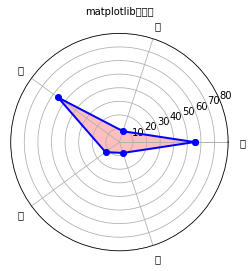

In [162]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['STSong'] # 指定默认字体 如果在自己机器上运行可能需要修改这里
matplotlib.rcParams['axes.unicode_minus'] = False

print(gz_fang)

#标签
labels = list(gz_fang.keys())
#数据个数
dataLenth = len(gz_fang)
#数据
data = list(gz_fang.values())

angles = np.linspace(0, 2 * np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]]))  # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data, 'bo-', linewidth=2)# 画线
ax.fill(angles, data, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="STSong")
ax.set_title("matplotlib雷达图", va='bottom', fontproperties="STSong")
ax.set_rlim(0, 80)
ax.grid(True)
plt.show()